Kaygi Erman and Vieillevigne Julien
DAI - 2024

In [31]:
# API key for ChatGPT & DALL-E

api = #API_PRIVATE_KEY


# ChatGPT Message Creation

In [32]:
# Function to return the message generate by the model gpt-3.5-turbo using API with a prompt as an input

import os
from openai import OpenAI

def advise_fashion(content):
    client = OpenAI(api_key=api)

    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "assistant",
                "content": content,
            }
        ],
        model="gpt-3.5-turbo",
    )
    
    return chat_completion.choices[0].message.content


# DALLE Image Creation

In [33]:
# Exemple of prompt that we want to have to generate a good fashion illustration from DALL-E


"""prompt = "Create a full-body portrait of a black man who is 50 years old and thin.\
      The image should capture him standing from head to toe. \
      The background behind him must be solid full grey. \
      Ensure that his posture and expression is neutral and convey his age and characteristics clearly. \
      \
        - white sneakers\
        - a black cargo\
        - a yellow super dry skyni t-shirt\
        - beret\
        - a diamond chain.\
        \
      the person has to take the whole picture \
      Only ONE person display"
"""


'prompt = "Create a full-body portrait of a black man who is 50 years old and thin.      The image should capture him standing from head to toe.       The background behind him must be solid full grey.       Ensure that his posture and expression is neutral and convey his age and characteristics clearly.               - white sneakers        - a black cargo        - a yellow super dry skyni t-shirt        - beret        - a diamond chain.              the person has to take the whole picture       Only ONE person display"\n'

In [34]:
# Function to return the url of the image generate by the model dall-e-3 using API with a prompt as an input

import requests
from IPython.display import Image

def url_image(prompt):
    client = OpenAI(api_key=api)

    response = client.images.generate(
      model="dall-e-3",
      prompt=prompt,
      n=1,
      size="1024x1024"
    )
    return response


In [35]:
# Function used to display the image generated using the previous url_image function and to display it using the url

from PIL import Image
from io import BytesIO

def display_image(prompt):
    response = url_image(prompt)

    response = requests.get(response.data[0].url)
    img = Image.open(BytesIO(response.content))

    return img


# Fashion Bot

In [36]:
# Definition of the Fashion Bot using a class
# This bot will allow us to chat with the user and retrieve information about them

import re
import random

class FashionBot:
    def __init__(self):
        self.regex_patterns = {
            "age": re.compile(r"(age|which age)"),
            "gender": re.compile(r"(gender|male|female)"),
            "origin": re.compile(r"(origin|origin)"),
            "style": re.compile(r"(light|lightly dress|lightly dress)"),
            "brand": re.compile(r"(brand|brands)"),
            "accessory": re.compile(r"(advice|advice)")
        }
        self.responses = {
            "age": [
                "I don't have a real age. How old are you?",
                "I'm eternally young as a chatbot. How old are you?",
                "How old are you? Mine is undetermined, but I'm here to answer your questions",
                "How old are you? I'm timeless!"
            ],
            "gender": [
                "I'm a chatbot, so I don't have a gender. What's yours?",
                "And what is your gender? Personally, I have no defined gender",
                "I'm a gender-neutral chatbot. What about you?",
                "What's your gender? As a chatbot, I'm neither masculine nor feminine."
            ],
            "origin": [
                "I'm designed by developers. Where do you come from?",
                "FashionBot comes from the internet. Where do you come from? ",
                "I'm virtual, so my origin is in the code. Where do you come from?",
                "I come from a server where I discuss fashion with users. Where do you come from?"
            ],
            "style": [
                "what you want to wear today?"
            ],
            "brand": [
                "What is your favourite brand?",
                "Do you have a favourite brand?"
            ],
            "accessory": [
                "Don't forget the accessories. They make the outfit complete. How about a watch?",
                "Don't underestimate the importance of accessories to complete your outfit. Do you want to wear them?"
            ]
        }

        self.prompt_template ="""
        Display a full body portrait, head to toe with a neutral facial expression and with these characteristics:

        - age: "{age}"
        - gender: "{gender}"
        - origin: "{origin}"
        - style: "{style}"
        - brand : "{brand}"
        - accessory : "{accessory}"
        """

        self.user_responses = {}

    def classify_intent(self, question):
        for intent, regex_pattern in self.regex_patterns.items():
            if regex_pattern.search(question):
                return intent
        return None

    def start_chat(self):
        print("Hello, I'm FashionBot. Let's talk fashion!")

        for intent, questions in self.responses.items():
            question = random.choice(questions)
            print("\nFashionBot: ", question)
            user_input = input("Me: ")
            self.user_responses[intent] = user_input

        print("\nSummary of your answers:")
        info = ""
        for intent, response in self.user_responses.items():
            print(f"  - {intent}: {response}")
            info += f"{intent}: {response} --- "
        full_prompt = self.prompt_template.format(**self.user_responses)
        
        return info


# Main function

Hello, I'm FashionBot. Let's talk fashion!

FashionBot:  I'm eternally young as a chatbot. How old are you?
Me: 26

FashionBot:  And what is your gender? Personally, I have no defined gender
Me: female

FashionBot:  I'm virtual, so my origin is in the code. Where do you come from?
Me: egypt

FashionBot:  what you want to wear today?
Me: I want to wear something happy

FashionBot:  What is your favourite brand?
Me: I dont have

FashionBot:  Don't underestimate the importance of accessories to complete your outfit. Do you want to wear them?
Me: no

Summary of your answers:
  - age: 26
  - gender: female
  - origin: egypt
  - style: I want to wear something happy
  - brand: I dont have
  - accessory: no




I advise you to wear a bright and colorful outfit that will match your desire to wear something happy. 

For the top, you can wear a vibrant yellow blouse with a loose fit. It will give you a comfortable and joyful look. Pair it with a pair of high-waisted blue jeans for a casual yet s

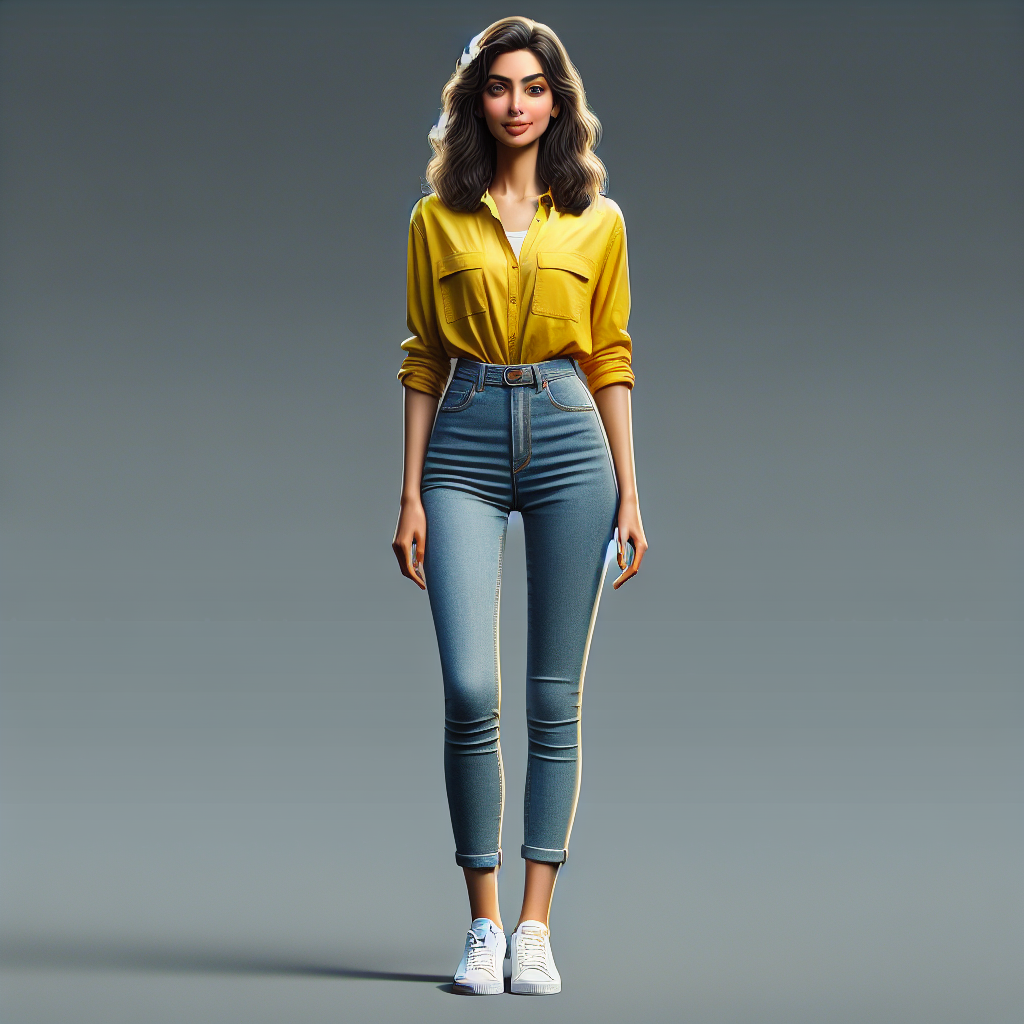

In [38]:
# Main algorithm that uses the functions and class defined above to provide the best possible advice to the user.

#Use of 2 prompts to obtain the best results for the user.
#These prompts contain instructions to follow and a contextualisation of the information given and the expected results.

if __name__ == "__main__":
    bot = FashionBot()
    prompt = bot.start_chat()

    prompt = f" Here is the information about the user{prompt}. Attribute well the brand and the color to the attribute clothes.\
            You'll need to advise her on the right outfit for her input.\
            You address the person directly in the response.\
            Start your answer with 'I advise you to ...'.\
            Give him some other clothes to wear with it.\
            Don't hesitate to add a jacket, accessories or tell her if her outfit isn't right but tries to keep some elements of his outfit. \
            If your outfit isn't right, you need to improve it.\
            \
            \
            At the end of your text, list all the clothes and accessories. \
            You need to specify what the outfit is, the colour, the shape if it's specified (like skinny or wide) and \
            the brand if it exists or any other element that helps describe that part of the outfit."
    response_advice = advise_fashion(prompt)
    
    test_prompt = f"Here is the information we have on the person and what has been advised for the fashion advisor.\
                    {prompt}{response_advice}\
                    \
                    \
                    \
                    Your role now is to create a prompt to help the user navigate using an illustration. Here's a sample prompt template that you'll have to follow to the letter:\
                    'Create a full-body portrait of a [color skin of ORIGIN] [GENDER] who is [AGE] years old and thin.\
                          The image should capture him standing from head to toe. \
                          The background behind him must be solid full grey. \
                          Ensure that his posture and expression is neutral and convey his age and characteristics clearly. \
                          \
                            - Type oh shoes, color, brand, style\
                            - type of pant, color, style\
                            - type of tshirt or shirt or other type for top body, color, style\
                            - beret\
                            - accesoirer, watch, chain, color, diamond.\
                            - Other...\
                            \
                          the person has to take the whole picture and must be in color \
                          Only ONE person display\
                          \
                          \
                          In the prompt you will only have to replace the age, the skin colour according to the origin and the range of clothes \
                          you collect according to the information I have given you.\
                    \
                    You must send me this new prompt and nothing more."
    print("\n\n\n")
    response_prompt_dalle = advise_fashion(test_prompt)
    
    print(response_advice)
    print("\n\n")
    
    display(display_image(response_prompt_dalle))
    